In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from api import co2_api
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('PR.mplstyle')


In [36]:
data = co2_api.get_data()

x = data.kyear
y = data.co2


In [37]:
# take data before industrial
INDUSTRIAL_REVOLUTION = 1820
YEAR_OF_LAST_DATA = 2001

kyear_before = (INDUSTRIAL_REVOLUTION - YEAR_OF_LAST_DATA) / 1000

data_before = data[data.kyear < kyear_before]
x = data_before.kyear
y = data_before.co2

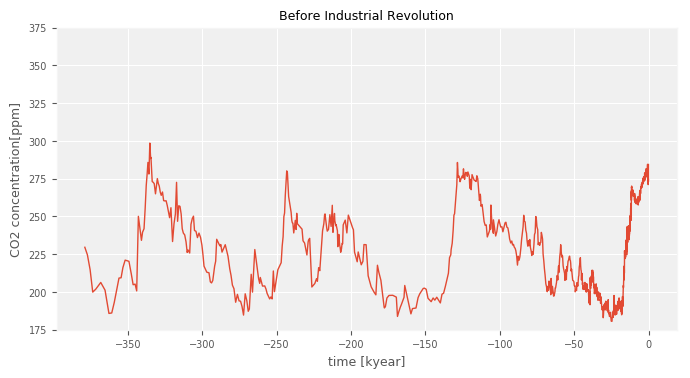

In [38]:
plt.figure(figsize=(8, 4))
plt.title("Before Industrial Revolution")
plt.ylim([175, 375])
plt.ylabel("CO2 concentration[ppm]")
plt.xlabel("time [kyear]")
plt.plot(x, y)
plt.show()

In [39]:
data_after = data[data.kyear >= kyear_before]
x = data_after.kyear
y = data_after.co2



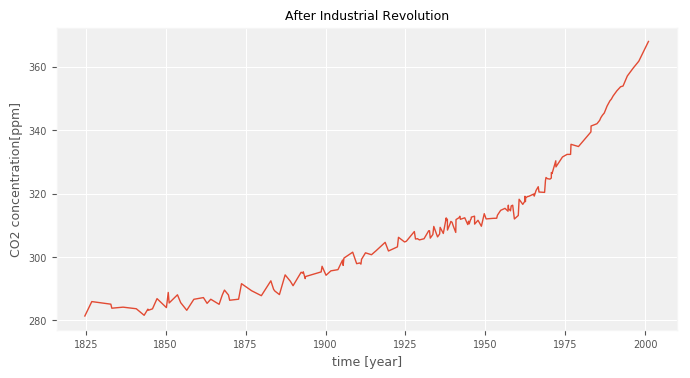

In [40]:
plt.figure(figsize=(8, 4))
plt.title("After Industrial Revolution")
plt.ylabel("CO2 concentration[ppm]")
plt.xlabel("time [year]")
x_after = [(2001 - (-xt * 1000)) for xt in x]
plt.plot(x_after, y)
plt.show()

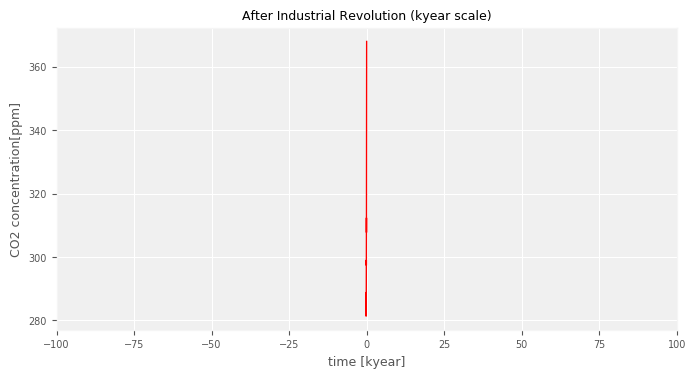

In [41]:
# Different scale to show the rate of change

plt.figure(figsize=(8, 4))
plt.title("After Industrial Revolution (kyear scale)")
plt.xlim([-100, 100])
plt.ylabel("CO2 concentration[ppm]")
plt.xlabel("time [kyear]")
plt.plot(x, y, color='red')
plt.show()

In [34]:

from sklearn.metrics.regression import mean_squared_error

# Brute force sine function parameter search
scores = []
for x_axis_increment in range(0, 100, 4):
    for amplitude in range(40, 60, 4):
        for y_axis_increment in range(200, 350, 10):
            for frequency in range(1, 40, 4):
                frequency = frequency / 10
                y_predict = [np.sin((xp * np.pi/180) * frequency - x_axis_increment) * amplitude + y_axis_increment for xp in x]
                scores.append((mean_squared_error(y, y_predict), x_axis_increment, y_axis_increment, amplitude, frequency))
print(min(scores))
# MSE: 426.03569152910427, 
# x_axis 68, y_axis 230, amplitude 40, frequency 3.3)

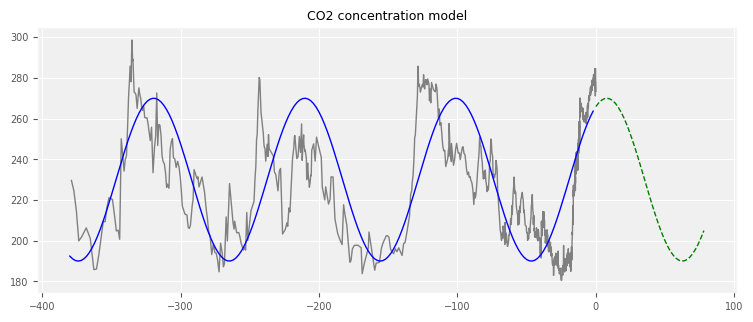

In [45]:

x = data_before.kyear
y = data_before.co2

x_sine = np.arange(-380.0, 0, 2)
x_sine_prediction = np.arange(0, 80, 2)

y_sine = np.sin((x_sine * np.pi/180) * 3.3 - 68) * 40 + 230
y_sine_prediction = np.sin((x_sine_prediction * np.pi/180) * 3.3 - 68) * 40 + 230

plt.figure(figsize=(9, 3.5))
plt.title("CO2 concentration model")
plt.plot(x, y, color="grey")

plt.plot(x_sine, y_sine, color='blue')
plt.plot(x_sine_prediction, y_sine_prediction, color='green', ls='--')
plt.show()



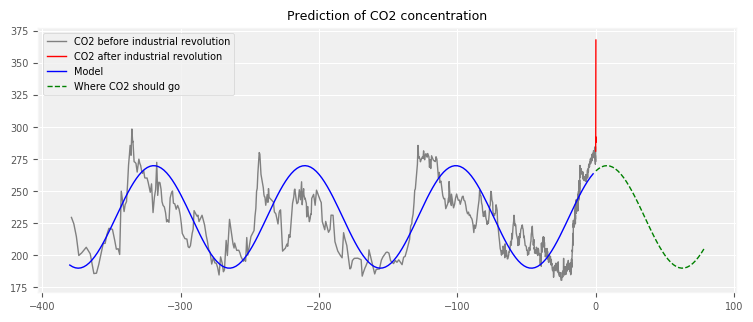

In [46]:
x_after = data_after.kyear
y_after = data_after.co2

x_sine = np.arange(-380.0, 0, 2)
x_sine_prediction = np.arange(0, 80, 2)

y_sine = np.sin((x_sine * np.pi/180) * 3.3 - 68) * 40 + 230
y_sine_prediction = np.sin((x_sine_prediction * np.pi/180) * 3.3 - 68) * 40 + 230

plt.figure(figsize=(9, 3.5))
plt.title("Prediction of CO2 concentration")
real_data = plt.plot(x, y, color='grey', lw=1, label="CO2 before industrial revolution")
real_data2 = plt.plot(x_after, y_after, color='red', label="CO2 after industrial revolution")

model_data = plt.plot(x_sine, y_sine, color='blue', label="Model")
model_prediction = plt.plot(x_sine_prediction, y_sine_prediction, color='green', ls='--', label="Where CO2 should go")


plt.legend()
plt.show()

In [47]:

from api import temperatures_api
import datetime

temp_data = temperatures_api.get_data()
temp_data.columns


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [48]:
# keep only countries that have consistent record from 1820 to 2013
countries = temp_data.Country.unique()

date1820 = datetime.datetime(1820, 1, 1, 1)
temp_data_sub = temp_data[temp_data.dt >= date1820]
# 193 * 12 = 2316 # take countries with at least 2200 records

country_df = temp_data_sub.groupby('Country').AverageTemperature.count()
valid_countries = country_df[country_df > 2200].index
temp_data_valid = temp_data_sub[temp_data_sub.Country.isin(valid_countries)]        
print(len(temp_data_valid))

220275


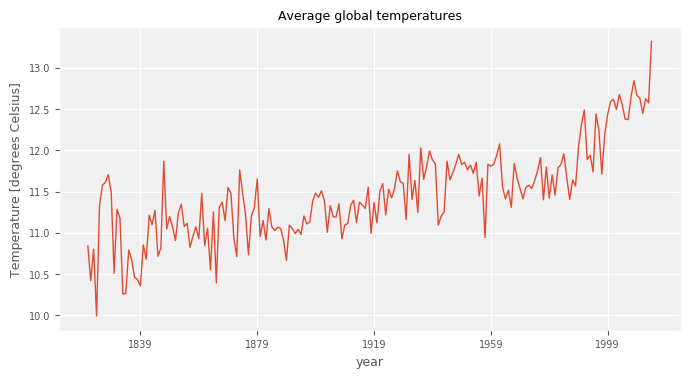

In [49]:
global_temps = temp_data_valid.groupby(pd.Grouper(key="dt", freq='Y')).mean().dropna()
x = global_temps.index
y = global_temps.AverageTemperature


plt.figure(figsize=(8, 4))

plt.title("Average global temperatures")
plt.xlabel("year")
plt.ylabel("Temperature [degrees Celsius]")
plt.plot(x.values, y.values)
plt.show()


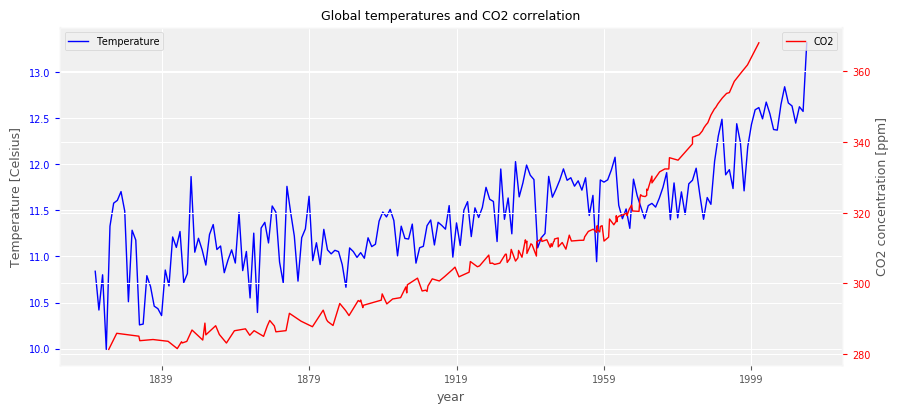

In [53]:
from math import floor
global_temps = temp_data_valid.groupby(pd.Grouper(key="dt", freq='Y')).mean().dropna()
x = global_temps.index
y = global_temps.AverageTemperature


y_co2 = data_after.co2
x_co2k = data_after.kyear
x_co2 = []
for t in x_co2k:
    ye = (2001 - (-t * 1000))
    yc = floor(ye)
    mc = floor((ye - yc) * 12 + 1)
    tc = datetime.datetime(yc, mc, 1)
    x_co2.append(tc)
    

fig, ax1 = plt.subplots()
fig.set_size_inches(9, 4)
ax1.plot(x, y, 'b-', label="Temperature")
ax1.set_xlabel('year')
ax1.set_ylabel('Temperature [Celsius]')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x_co2, y_co2, 'r-', label="CO2")
ax2.set_ylabel('CO2 concentration [ppm]')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title("Global temperatures and CO2 correlation")
ax1.legend()
ax2.legend(loc=1)
plt.show()


In [54]:
from sklearn.linear_model import Ridge, LinearRegression


In [55]:
x = global_temps.index
y = global_temps.AverageTemperature

ridge = Ridge(alpha=0.1)
x_data = np.array([t.year + (t.month - 1) / 12 + (t.day - 1) / 365 for t in x])
x_data = x_data.reshape(-1, 1)
y_data = np.array(y)


ridge.fit(x_data, y)

y_predict = ridge.predict(x_data)
print(ridge.score(x_data, y))


0.6150239501066719


In [56]:
linear_model = LinearRegression()
linear_model.fit(x_data, y)
linear_model.score(x_data, y)


0.6150239501066884

In [57]:
# Ustvarimo ustrezen prostor
D = 50
X = np.zeros((len(x_data), D))
for d in range(0, D):
    X[:, d] = x_data.ravel()**d

model = Ridge(alpha=1.0, normalize=True)
model.fit(X, y)

y_predict = model.predict(X)
print(model.score(X, y))

0.6723700354415025


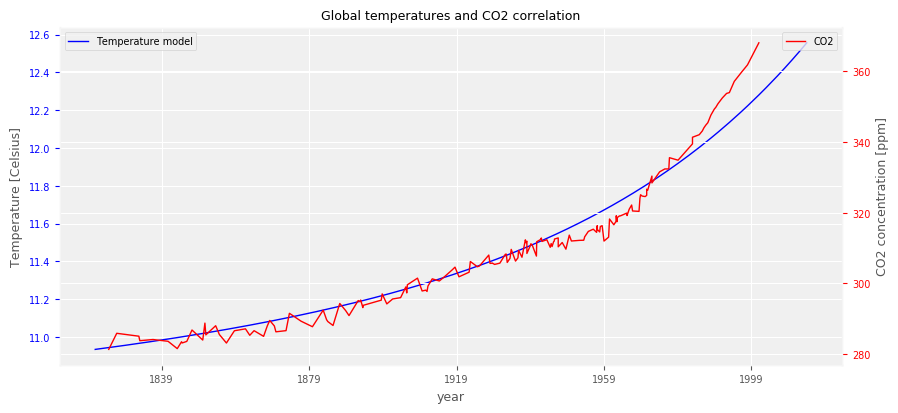

In [58]:


fig, ax1 = plt.subplots()
fig.set_size_inches(9, 4)
ax1.plot(x, y_predict, 'b-', label="Temperature model")
ax1.set_xlabel('year')
ax1.set_ylabel('Temperature [Celsius]')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x_co2, y_co2, 'r-', label="CO2")
ax2.set_ylabel('CO2 concentration [ppm]')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title("Global temperatures and CO2 correlation")
ax1.legend()
ax2.legend(loc=1)
plt.show()
